In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/pyplot-perso")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [3]:
log = lammps_logfile.File("log.lammps")
timestep = 0.005
time = log.get("Step")*timestep
population1 = log.get("v_n1_in")
population2 = log.get("v_n2_in")
coordination = log.get("c_sumcoor12") 

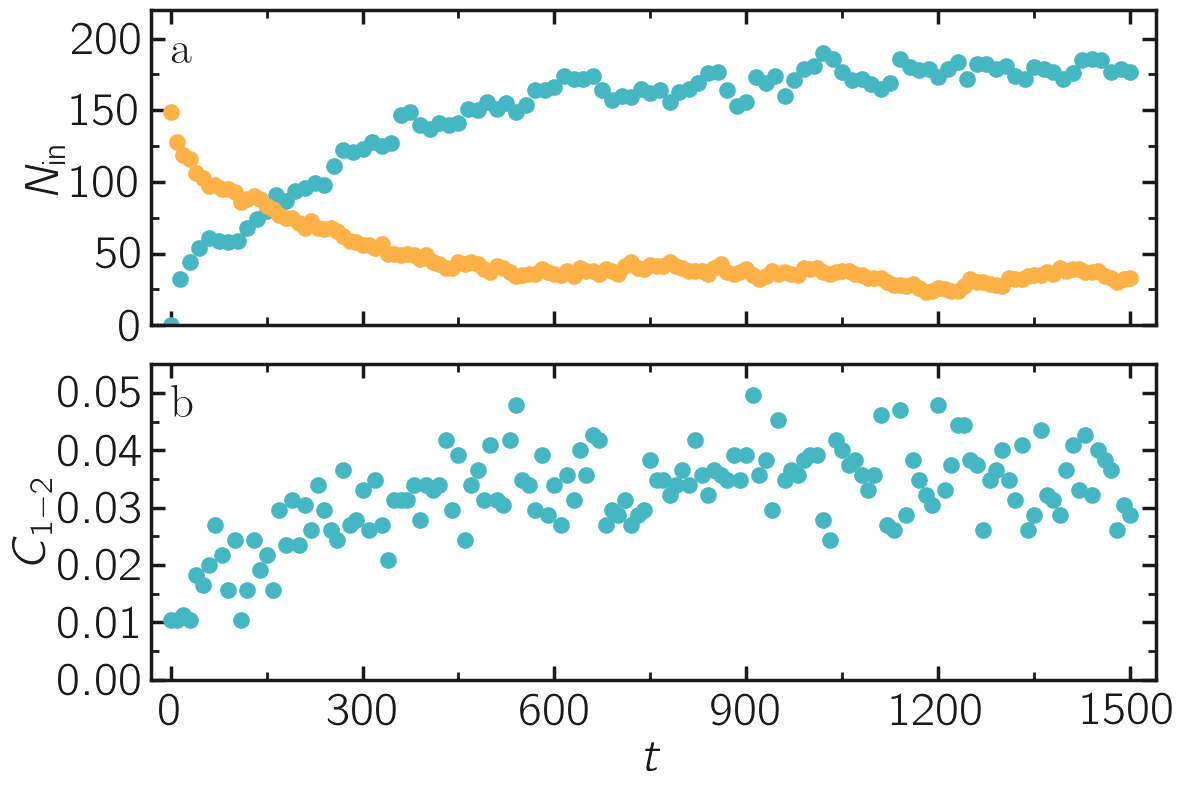

In [4]:
filename = "LJ-mixing"
dark_mode = False
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = dark_mode,
                    transparency = False, use_serif=False, n_line=2)
myplt.add_panel()
myplt.add_plot(x = time[::3], y =  population1[::3], type = "plot", linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12,
                data_label = r'$E_{12}$')
myplt.add_plot(x = time[::2], y = population2[::2], type = "plot", linewidth_data = 3,
                marker = "o", data_color = 1, markersize = 12,
                data_label = r'$E_{12}$')
myplt.complete_panel(ylabel = r'$N_\mathrm{in}$',
                        xlabel = None,
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 1800, 300), x_boundaries=(-30, 1540),
                        y_ticks=np.arange(0, 250, 50), y_boundaries=(0, 220))

myplt.add_panel()
myplt.add_plot(x = time[::2], y = coordination[::2], type = "plot", linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12,
                data_label = r'$\mathrm{Energy~Minimization}$')
myplt.complete_panel(ylabel = r'$C_{1-2}$', xlabel = r'$t$',
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 1800, 300), x_boundaries=(-30, 1540),
                y_ticks=np.arange(0, 0.06, 0.01), y_boundaries=(0.0, 0.055))
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)